## Observations and Insights 

In [1]:
# %matplotlib widget

In [196]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Automatically set Data Frames to 2 decimal places
pd.options.display.precision = 2

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(study_results, mouse_metadata, on = ['Mouse ID'], how = 'outer')
# Display the data table for preview
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,b128,5,45.65,0,Capomulin,Female,9,22
2,b128,10,43.27,0,Capomulin,Female,9,22
3,b128,15,43.78,0,Capomulin,Female,9,22
4,b128,20,42.73,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
mice = merge_data["Mouse ID"].nunique()
mice

249

In [197]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merge_data[merge_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.00,0,Propriva,Female,21,26
863,g989,5,47.57,0,Propriva,Female,21,26
865,g989,10,49.88,0,Propriva,Female,21,26
867,g989,15,53.44,0,Propriva,Female,21,26
869,g989,20,54.66,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = duplicates["Mouse ID"].unique()
duplicate_data

array(['g989'], dtype=object)

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_data.loc[merge_data["Mouse ID"]!= "g989"]
clean_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,b128,5,45.65,0,Capomulin,Female,9,22
2,b128,10,43.27,0,Capomulin,Female,9,22
3,b128,15,43.78,0,Capomulin,Female,9,22
4,b128,20,42.73,0,Capomulin,Female,9,22
5,b128,25,43.26,1,Capomulin,Female,9,22
6,b128,30,40.61,1,Capomulin,Female,9,22
7,b128,35,37.97,1,Capomulin,Female,9,22
8,b128,40,38.38,2,Capomulin,Female,9,22
9,b128,45,38.98,2,Capomulin,Female,9,22


In [7]:
clean_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [8]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()
clean_mice

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Create a Data Frame, by using the groupby function and then carrying out calculations by aggregation on the "Tumor Volume (mm3)" column
drug_regimen = clean_df.groupby("Drug Regimen").agg(
            Mean =("Tumor Volume (mm3)", np.mean),
            Median =("Tumor Volume (mm3)", np.median),
            Variance =("Tumor Volume (mm3)", np.var),
            Standard_Deviation =("Tumor Volume (mm3)", np.std),
            SEM =("Tumor Volume (mm3)", st.sem))
        
# Display the Data Frame
drug_regimen

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

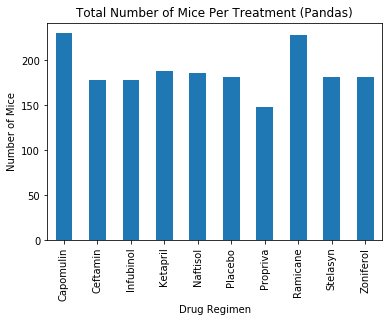

<Figure size 432x288 with 0 Axes>

In [202]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Group the data frame "clean_df", by "Drug Regimen" and then count the total number of mice for each "Drug Regimen"
treatment_mice = clean_df.groupby("Drug Regimen")
count_mice = treatment_mice["Mouse ID"].count()

# Create a bar chart based off the group by series "Drug Regimen"
mice_chart = count_mice.plot(kind="bar", title="Total Number of Mice Per Treatment (Pandas)")

# Set the x and y labels
mice_chart.set_xlabel("Drug Regimen")
mice_chart.set_ylabel("Number of Mice")

# Show the plot, give it a tight layout and save
plt.show()
plt.tight_layout()
# plt.savefig("Images/Total_Mice_Treatment_(Pandas).png")

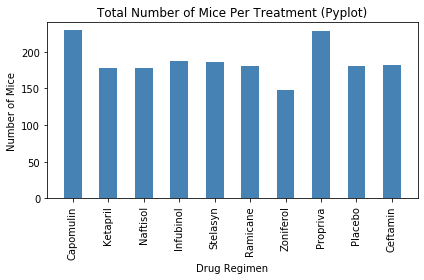

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_regimen = clean_df["Drug Regimen"].unique()
py_mice = treatment_mice["Mouse ID"].count()

# Set x axis and tick locations 
x_axis = np.arange(len(drug_regimen))
tick_locations = [value for value in x_axis]

# Tell matplotlib that we will be making a bar chart
# Drug Regimen is our x axis and Number of Mice is our  axis
plt.bar(drug_regimen, py_mice, color='steelblue', align="center", width = 0.5)
    
# Place each of our x axis headers 
plt.xticks(tick_locations, drug_regimen, rotation="vertical")
    
# Set x and y limits
# plt.xlim(-0.25, len(drug_regimen))
plt.ylim(0, 240)

         
# Set a Title and x and y labels 
plt.title("Total Number of Mice Per Treatment (Pyplot)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

# Show the plot, give it a tight layout and save
plt.tight_layout()
# plt.savefig("Images/Total_Mice_Treatment_(Pandas).png")

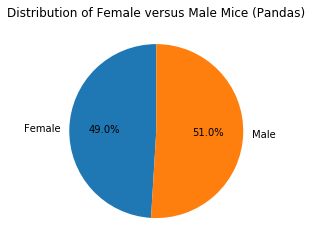

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Group the data frame "clean_df", by "Sex" and then count the total number of mice for each "Sex"
mice_sex = clean_df.groupby("Sex")
count_sex = mice_sex["Mouse ID"].count()

# Create a pie chart based off the group by series "Sex"
mice_pie = count_sex.plot(kind="pie", startangle = 90, autopct='%1.1f%%', title="Distribution of Female versus Male Mice (Pandas)")

# Set y labels
mice_pie.set_ylabel("")


# Show the plot, give it a tight layout and save
plt.show();
plt.tight_layout()
# plt.savefig("Images/Distribution_of_Female_versus_Male_Mice_(Pandas).png")

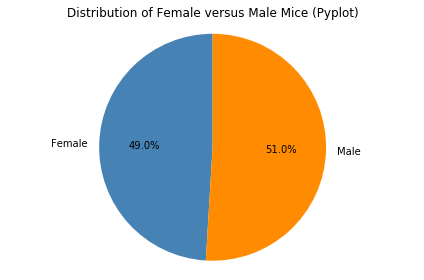

In [200]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create labels for the pie plot

gender = clean_df["Sex"].unique()
gender_count = mice_sex["Mouse ID"].count()

# Choose colours for each of the sections within the pie plot
colors = ["steelblue","darkorange"]

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%", startangle=90)

# Add a title
plt.title("Distribution of Female versus Male Mice (Pyplot)")

# Create axes which are equal so we have a perfect circle
plt.axis("equal");
plt.tight_layout()
# plt.savefig("Images/Distribution_of_Female_versus_Male_Mice_(Pyplot).png")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse by sorting the dataframe in decending order, to have the greatest value first; then dropping any remaining duplicates
sorted_df = clean_df.sort_values("Timepoint", ascending=False)

# Drop duplicates to remove additional timepoints for each mouse
cleaned_df = sorted_df.drop_duplicates(subset="Mouse ID", keep="first")

# Remove any treatments which we don't want to see
df_1 = cleaned_df.loc[cleaned_df["Drug Regimen"]!= "Ketapril"]
df_2 = df_1.loc[df_1["Drug Regimen"]!= "Naftisol"]
df_3 = df_2.loc[df_2["Drug Regimen"]!= "Stelasyn"]
df_4 = df_3.loc[df_3["Drug Regimen"]!= "Zoniferol"]
df_5 = df_4.loc[df_3["Drug Regimen"]!= "Propriva"]
final_clean = df_5.loc[df_3["Drug Regimen"]!= "Placebo"]


### I feel I have gotten the intended result without merging 
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_clean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1892,m601,45,28.43,1,Capomulin,Male,22,17
554,a644,45,32.98,1,Ramicane,Female,7,17
1754,u364,45,31.02,3,Capomulin,Male,18,17
524,c758,45,33.40,1,Ramicane,Male,9,17
514,k403,45,22.05,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1425,o813,5,45.70,0,Infubinol,Male,24,28
1649,t573,0,45.00,0,Ceftamin,Female,15,27
1613,x226,0,45.00,0,Ceftamin,Male,23,28
1401,u153,0,45.00,0,Ceftamin,Female,11,25


In [253]:
# Put treatments into a list for for loop (and later for plot labels)
# Create a list of all 4 treatments 
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list(s) to fill with tumor vol data (for plotting)
tumor_vol_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_clean.loc[final_clean["Drug Regimen"] == drug, "Tumor Volume (mm3)"]

    # Append tumor volumes to tumor list
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    # Calculate the quartiles and IQR for each treatment, and quantitatively determine if there are any potential outliers across all four treatment regimens.
    quartiles = tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Print out the calculations in a readable format
    print("\n\n")
    print(f"Treatment Type: {drug}")
    print("--------------------------------------------------------------------")
    print(f"The lower quartile of tumor volume is: {lowerq}")
    print(f"The upper quartile of tumor volume is: {upperq}")
    print(f"The interquartile range of tumor volume is: {iqr}")
    print(f"The the median of tumor volume is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers for tumor volume.")
    print(f"Values above {upper_bound} could be outliers for tumor volume.")
    

    # Determine the outliers using the upper and lower bounds
    outliers = final_clean.loc[(final_clean["Tumor Volume (mm3)"] < lower_bound) | (final_clean["Tumor Volume (mm3)"] > upper_bound)]

    outliers    
    
    if outliers.empty: 
        print(f"There are no outliers for {drug} in the data.")

    # If there are outliers, display a data frame containing all of the outliers for the treatment (drug) type
    else:
        print(f"\nThe following are outliers for {drug} in the data: \n" )
        outliers






Treatment Type: Capomulin
--------------------------------------------------------------------
The lower quartile of tumor volume is: 32.37735684
The upper quartile of tumor volume is: 40.1592203
The interquartile range of tumor volume is: 7.781863460000004
The the median of tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers for tumor volume.
Values above 51.83201549 could be outliers for tumor volume.

The following are outliers for Capomulin in the data: 




Treatment Type: Ramicane
--------------------------------------------------------------------
The lower quartile of tumor volume is: 31.56046955
The upper quartile of tumor volume is: 40.65900627
The interquartile range of tumor volume is: 9.098536719999998
The the median of tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers for tumor volume.
Values above 54.30681135 could be outliers for tumor volume.

The following are outliers for Ramicane in the data: 




Tr

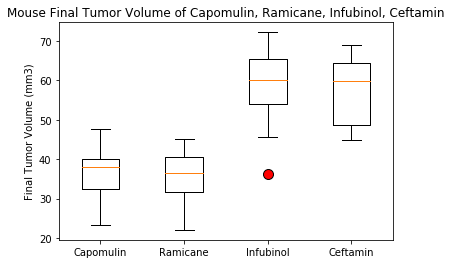

In [249]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Set properties for any outliers
outliers = dict(markerfacecolor = "red", markersize = 10)

# Plot box plot with infomration from the tumor volume list, including drug names as labels for each plot, and assign the outlier properties
plt.boxplot(tumor_vol_list, flierprops=outliers, labels = treatment_list)

# Give the plot a title and y label
plt.title("Mouse Final Tumor Volume of Capomulin, Ramicane, Infubinol, Ceftamin")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume (mm3) vs Time for Mouse x401 treated with Capomulin')

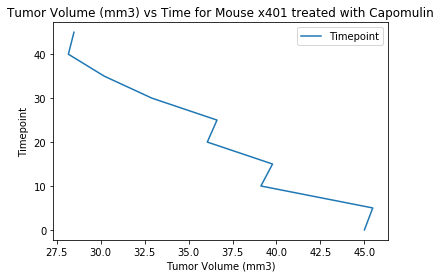

In [44]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create a new data frame with only the drug we want to see 
capo_mice_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

# Select the mouse we want to plot
new_capo_mice_df = capo_mice_df.loc[capo_mice_df["Mouse ID"]=="x401"]

# Plot a line graph showing tumor volume over time
new_capo_mice_df.set_index("Tumor Volume (mm3)")["Timepoint"].plot();

# Set x and y labels and create a legend 
plt.ylabel("Timepoint")
plt.legend()

# Add a title 
plt.title("Tumor Volume (mm3) vs Time for Mouse x401 treated with Capomulin")

# Save image
# plt.savefig("Images/Tumor_Volume_(mm3)_vs_Time_for_Mouse_x401_treated_with_Capomulin.png")

In [47]:

# capo_mice_df2 = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

# # Select the mouse we want to plot
# new_capo_mice_df2 = capo_mice_df2.loc[capo_mice_df["Mouse ID"]=="u364"]

# # Plot a line graph showing tumor volume over time
# new_capo_mice_df2.set_index("Tumor Volume (mm3)")["Timepoint"].plot();

# # Set x and y labels and create a legend 
# plt.ylabel("Timepoint")
# plt.legend()

# # Add a title 
# plt.title("Tumor Volume (mm3) vs Time for Mouse u364 treated with Capomulin")

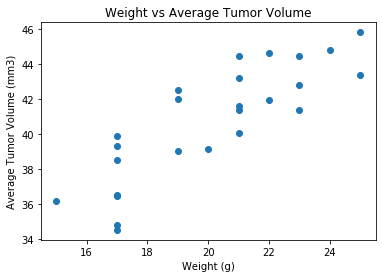

In [188]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Create a new data frame with only the drug Capomulin
scatter_df = clean_df.loc[clean_df["Drug Regimen"]=="Capomulin",:]

# Calculate the average weight and tumor volume per mouse
weight = scatter_df.groupby(["Mouse ID"]).mean()["Weight (g)"]
tumor = scatter_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]

# Plot a scatter using subplots
fig, weightvtumor = plt.subplots()
weightvtumor.scatter(weight, tumor)

# Set title, x label and y label
weightvtumor.set_title("Weight vs Average Tumor Volume");
weightvtumor.set_xlabel("Weight (g)");
weightvtumor.set_ylabel("Average Tumor Volume (mm3)");

# Save image
# plt.savefig("Images/Weight_vs_Average_Tumor_Volume.png")

## Correlation and Regression


The correlation between Mouse Weight and Average Tumor Volume is 0.84



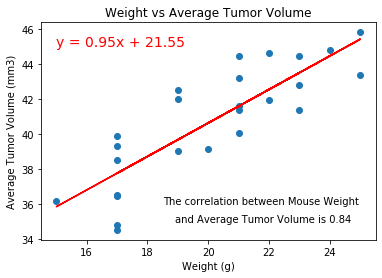

In [191]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Use dataframe and variables from above scatter plot 

# Calculate the linear regression
(slope, intercept,r_value,p_value,std_err) = st.linregress(weight,tumor)
regress_values = weight * slope + intercept

# Calculate and print correlation factor
correlation = st.pearsonr(weight, tumor)
print(f"\nThe correlation between Mouse Weight and Average Tumor Volume is {round(correlation[0],2)}\n")
correlation_annotation1 = "The correlation between Mouse Weight"
correlation_annotation2 = "and Average Tumor Volume is 0.84"

# Plot a scatter 
plt.scatter(weight,tumor);

# Plot linear model on top of the scatter plot
plt.plot(weight,regress_values,"red");
line_annotation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set title, x label and y label
plt.title("Weight vs Average Tumor Volume");
plt.ylabel("Average Tumor Volume (mm3)");
plt.xlabel("Weight (g)");
plt.annotate(line_annotation,(15,45),fontsize = 14, color="red");
plt.annotate(correlation_annotation1, (18.5,36))
plt.annotate(correlation_annotation2, (18.9,35))
plt.show()


# Save image
# plt.savefig("Images/Weight_vs_Average_Tumor_Volume_Correlation.png")